In [69]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import matplotlib as plt
import statsmodels as sm
import statsmodels.formula.api as smf

os.getenv("PUIDATA")
#pl.rcParams.update(s)
#if os.getenv("PUIDATA") is None:
    #print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['scatter', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
pwd

u'/wingrdp/homedirs/mas1300/PUI2017/PUI2017_mas1300'

In [3]:
!echo $PUIDATA

/home/cusp/mas1300/PUIdata


In [4]:
ls

Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv
HW1_mas1300  /
HW2_mas1300/
HW3_mas1300/
HW4_mas1300/
HW5_mas1300/
HW_6_mas1300.ipynb
HW6_mas1300.ipynb
Lab3_mas1300.md
MN.csv
mn_mappluto_16v2/
mn_mappluto_16v2.zip.1
PUIdata/
PUIHW6.ipynb


In [5]:
#os.getenv("PUIDATA")
#!echo $PUIDATA

In [6]:
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
#bsize = gp.GeoDataFrame.from_file("mn_mappluto_16v2/MNMapPLUTO.shp")
bsize1= gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") +"/MN.csv")
#bsize2= gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") +"MN.csv")

#nrg= gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
#bsize= gp.GeoDataFrame.from_csv("MN.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [7]:
bsize1.head()

,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
Borough,,,,,,,,,,,,,,,,,,,,,
MN,1,10,101,5.0,1018.0,2.0,1.0,10004.0,E007,1.0,...,190225.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16V2
MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,1.0,...,190636.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16V2
MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,E007,1.0,...,193648.0,12b,NaN,199 999,10101.0,NaN,0.0,NaN,1,16V2
MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,1.0,...,NaN,12b,NaN,199 999,10101.0,NaN,0.0,NaN,4,16V2
MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,1.0,...,NaN,12b,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,16V2


In [8]:
nrg.head()
list(nrg.columns.values)

['BBL',
 'Co-reported BBL Status',
 'BBLs Co-reported',
 'Reported NYC Building Identificaiton Numbers (BINs)',
 'Street Number',
 'Street Name',
 'Borough',
 'Postcode',
 'DOF Benchmarking Submission Status',
 'Site EUI(kBtu/ft2)',
 'Weather Normalized Site EUI(kBtu/ft2)',
 'Source EUI(kBtu/ft2)',
 'Weather Normalized Source EUI(kBtu/ft2)',
 'Municipally Supplied Potable Water - Indoor Intensity (gal/ft\xc2\xb2)',
 'Automatic Water Benchmarking Eligible',
 'Reported Water Method',
 'ENERGY STAR Score',
 'Total GHG Emissions(MtCO2e)',
 'Direct GHG Emissions(MtCO2e)',
 'Indirect GHG Emissions(MtCO2e)',
 'Reported Property Floor Area (Building(s)) (ft\xc2\xb2)',
 'DOF Property Floor Area (Buildngs and Parking)(ft2)',
 'Primary Property Type - Self Selected',
 'DOF Number of Buildings',
 'Latitude',
 'Longitude',
 'Community Board',
 'Council District',
 'Census Tract',
 'BIN',
 'NTA']

In [9]:
list(bsize1.columns.values)

['Block',
 'Lot',
 'CD',
 'CT2010',
 'CB2010',
 'SchoolDist',
 'Council',
 'ZipCode',
 'FireComp',
 'PolicePrct',
 'HealthArea',
 'SanitBoro',
 'SanitDistrict',
 'SanitSub',
 'Address',
 'ZoneDist1',
 'ZoneDist2',
 'ZoneDist3',
 'ZoneDist4',
 'Overlay1',
 'Overlay2',
 'SPDist1',
 'SPDist2',
 'SPDist3',
 'LtdHeight',
 'SplitZone',
 'BldgClass',
 'LandUse',
 'Easements',
 'OwnerType',
 'OwnerName',
 'LotArea',
 'BldgArea',
 'ComArea',
 'ResArea',
 'OfficeArea',
 'RetailArea',
 'GarageArea',
 'StrgeArea',
 'FactryArea',
 'OtherArea',
 'AreaSource',
 'NumBldgs',
 'NumFloors',
 'UnitsRes',
 'UnitsTotal',
 'LotFront',
 'LotDepth',
 'BldgFront',
 'BldgDepth',
 'Ext',
 'ProxCode',
 'IrrLotCode',
 'LotType',
 'BsmtCode',
 'AssessLand',
 'AssessTot',
 'ExemptLand',
 'ExemptTot',
 'YearBuilt',
 'YearAlter1',
 'YearAlter2',
 'HistDist',
 'Landmark',
 'BuiltFAR',
 'ResidFAR',
 'CommFAR',
 'FacilFAR',
 'BoroCode',
 'BBL',
 'CondoNo',
 'Tract2010',
 'XCoord',
 'YCoord',
 'ZoneMap',
 'ZMCode',
 'Sanbo

In [10]:
bsize1.columns

Index([u'Block', u'Lot', u'CD', u'CT2010', u'CB2010', u'SchoolDist',
       u'Council', u'ZipCode', u'FireComp', u'PolicePrct', u'HealthArea',
       u'SanitBoro', u'SanitDistrict', u'SanitSub', u'Address', u'ZoneDist1',
       u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1', u'Overlay2',
       u'SPDist1', u'SPDist2', u'SPDist3', u'LtdHeight', u'SplitZone',
       u'BldgClass', u'LandUse', u'Easements', u'OwnerType', u'OwnerName',
       u'LotArea', u'BldgArea', u'ComArea', u'ResArea', u'OfficeArea',
       u'RetailArea', u'GarageArea', u'StrgeArea', u'FactryArea', u'OtherArea',
       u'AreaSource', u'NumBldgs', u'NumFloors', u'UnitsRes', u'UnitsTotal',
       u'LotFront', u'LotDepth', u'BldgFront', u'BldgDepth', u'Ext',
       u'ProxCode', u'IrrLotCode', u'LotType', u'BsmtCode', u'AssessLand',
       u'AssessTot', u'ExemptLand', u'ExemptTot', u'YearBuilt', u'YearAlter1',
       u'YearAlter2', u'HistDist', u'Landmark', u'BuiltFAR', u'ResidFAR',
       u'CommFAR', u'FacilFAR', u

In [11]:
nrg1 = nrg[['BBL', 'ENERGY STAR Score', 'DOF Property Floor Area (Buildngs and Parking)(ft2)', 'Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)']].copy()
nrg1= nrg1.dropna(axis=0)
nrg1.head()

,BBL,ENERGY STAR Score,DOF Property Floor Area (Buildngs and Parking)(ft2),Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,,,
3028,1.013110e+09,68,313200.0,125.4,330000
9863,4.002520e+09,100,184400.0,46,390400
977,1.007660e+09,4,53168.0,122.3,59468
1256,1.008150e+09,52,364000.0,117,364000
500,1.005050e+09,44,214110.0,82.1,235370


In [12]:
bsize1.head()

,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
Borough,,,,,,,,,,,,,,,,,,,,,
MN,1,10,101,5.0,1018.0,2.0,1.0,10004.0,E007,1.0,...,190225.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16V2
MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,1.0,...,190636.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16V2
MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,E007,1.0,...,193648.0,12b,NaN,199 999,10101.0,NaN,0.0,NaN,1,16V2
MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,1.0,...,NaN,12b,NaN,199 999,10101.0,NaN,0.0,NaN,4,16V2
MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,1.0,...,NaN,12b,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,16V2


In [13]:
bsize1 = bsize1[['BBL', 'ZipCode', 'UnitsRes', 'UnitsTotal', 'YearBuilt']].copy()
bsize1.dropna()

,BBL,ZipCode,UnitsRes,UnitsTotal,YearBuilt
Borough,,,,,
MN,1.000010e+09,10004.0,0,0,1900
MN,1.000010e+09,10004.0,0,0,1900
MN,1.000010e+09,10004.0,0,0,1900
MN,1.000010e+09,10004.0,0,0,0
MN,1.000010e+09,10004.0,0,0,0
MN,1.000020e+09,10004.0,0,0,1900
MN,1.000020e+09,10004.0,0,0,1900
MN,1.000020e+09,10004.0,0,0,1900
MN,1.000020e+09,10004.0,0,0,1987


In [14]:
bnrg= pd.merge(bsize1, nrg1, on='BBL')


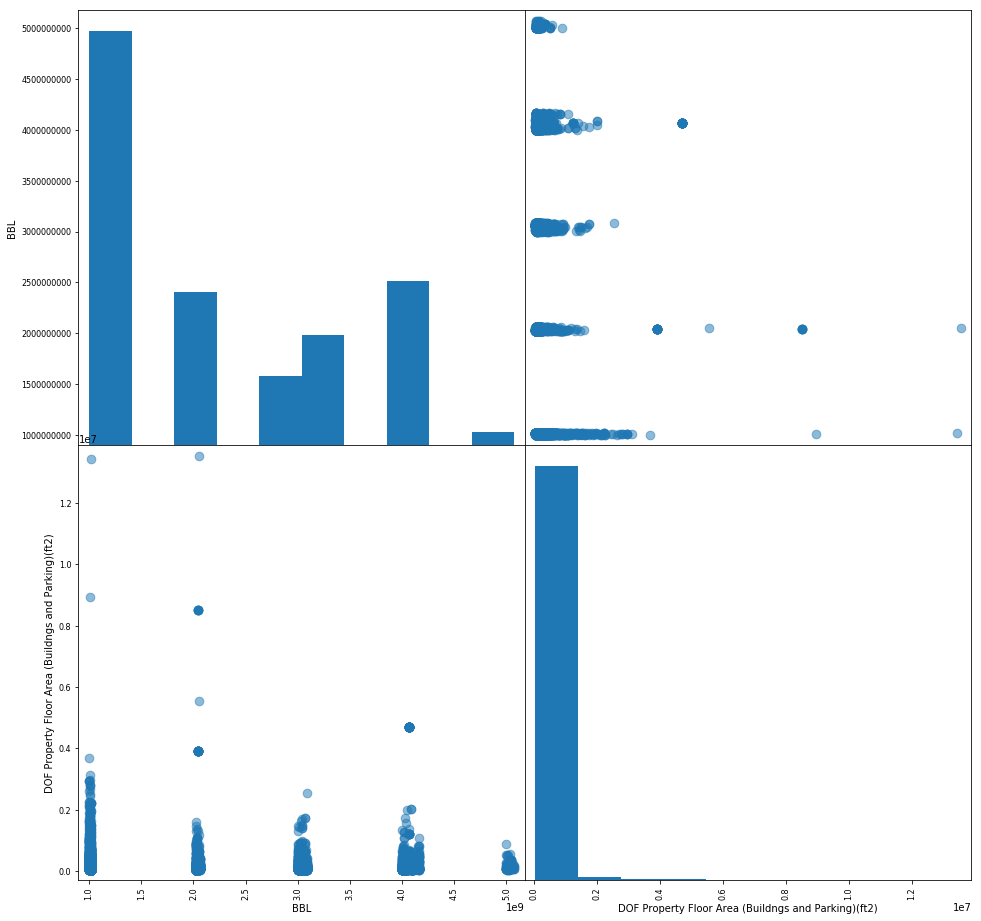

In [15]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg1, s=300, figsize=(16, 16));

Figure 1: scatter matrix of all numerical values in the files. ... comments on what you see
    
This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: I need to remove all values that cannot convert to float in order to use the columns and convert them to float arrays and do math with them.

You can use pd.to_numeric() which is a function that transforms values to float (when possible). The default behavior of this function is to throw an error if it encounters a value that it cannot convert. That behavior can be modified with the "error" keyword, by setting it to "coerce". Please look at the function documentation to understand the syntax.    

In [16]:
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
#https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
#nrg1= pd.DataFrame(data = nrg1)


In [17]:
#nrg1 = nrg1.rename(columns={'Site EUI(kBtu/ft2)': 'site_EUI_kbtuft2', 'Reported Property Floor Area (Building(s)) (ft²)': 'Reported_Property_Floor_Area_ft2'}, inplace=True)
#nrg1= pd.DataFrame(data = nrg1)

nrg1['Reported_Property_Floor_Area_ft2']= nrg1['Reported Property Floor Area (Building(s)) (ft²)']

In [18]:
bnrg['Site_EUI_kBtu_ft2'] = pd.to_numeric(bnrg['Site EUI(kBtu/ft2)'], errors= "coerce") 
nrg1['Site_EUI_kBtu_ft2'] = pd.to_numeric(nrg1['Site EUI(kBtu/ft2)'], errors= "coerce") 

In [19]:
bnrg['Reported_Property_Floor_Area_ft2'] = pd.to_numeric(bnrg['Reported Property Floor Area (Building(s)) (ft²)'], errors= "coerce") 
nrg1['Reported_Property_Floor_Area_ft2'] = pd.to_numeric(nrg1['Reported_Property_Floor_Area_ft2'], errors= "coerce") 
#nrg1['UnitsTotal'] = pd.to_numeric(nrg1['UnitsTotal'], errors= "coerce") 
bnrg['UnitsTotal'] = pd.to_numeric(bnrg['UnitsTotal'], errors= "coerce") 


In [20]:
#bsize1.BBL.astype(float)
bnrg.Site_EUI_kBtu_ft2.astype(float)
bnrg.UnitsTotal.astype(float)
#nrg1.UnitsTotal.astype(float)

nrg1.Site_EUI_kBtu_ft2.astype(float)
nrg1.dropna()

,BBL,ENERGY STAR Score,DOF Property Floor Area (Buildngs and Parking)(ft2),Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),Reported_Property_Floor_Area_ft2,Site_EUI_kBtu_ft2
Record Number,,,,,,,
3028,1.013110e+09,68,313200.0,125.4,330000,330000.0,125.4
9863,4.002520e+09,100,184400.0,46,390400,390400.0,46.0
977,1.007660e+09,4,53168.0,122.3,59468,59468.0,122.3
1256,1.008150e+09,52,364000.0,117,364000,364000.0,117.0
500,1.005050e+09,44,214110.0,82.1,235370,235370.0,82.1
5017,1.021420e+09,Not Available,64816.0,137.7,64806,64806.0,137.7
5116,1.021750e+09,Not Available,62847.0,103.2,62839,62839.0,103.2
363,1.003360e+09,Not Available,98052.0,74,98000,98000.0,74.0
6876,2.040830e+09,98,53285.0,36.4,53275,53275.0,36.4


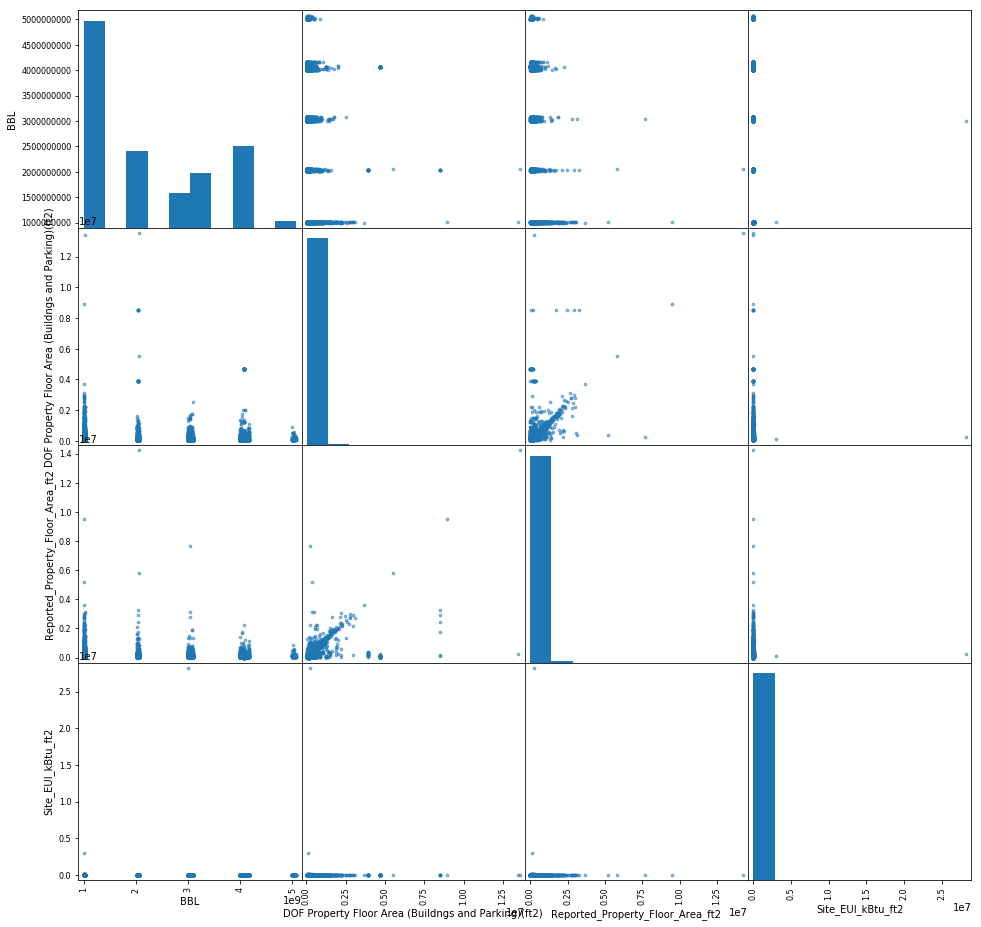

In [21]:
scatter_matrix (nrg1, s=30, figsize=(16, 16));

In [22]:
#Energy vs Number of Units in the Building

In [23]:
bnrg.head()

,BBL,ZipCode,UnitsRes,UnitsTotal,YearBuilt,ENERGY STAR Score,DOF Property Floor Area (Buildngs and Parking)(ft2),Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),Site_EUI_kBtu_ft2,Reported_Property_Floor_Area_ft2
0,1.000048e+09,10004.0,0,52,1969,92,2621563.0,92.5,2428325,92.5,2428325.0
1,1.000058e+09,10004.0,0,7,1970,73,1354691.0,134.5,1338000,134.5,1338000.0
2,1.000088e+09,10004.0,97,98,1985,Not Available,169061.0,118.9,169055,118.9,169055.0
3,1.000090e+09,10004.0,0,9,1970,78,845018.0,78.5,852840,78.5,852840.0
4,1.000090e+09,10004.0,0,0,1987,Not Available,544015.0,68.6,574095,68.6,574095.0


In [24]:
type(bnrg["UnitsTotal"]), type(bnrg["Site EUI(kBtu/ft2)"])

(pandas.core.series.Series, pandas.core.series.Series)

In [25]:
bnrg["Site_EUI"] = bnrg["Site_EUI_kBtu_ft2"]*bnrg["Reported_Property_Floor_Area_ft2"]

In [26]:
x = bnrg["UnitsTotal"]
y = bnrg["Site_EUI"]

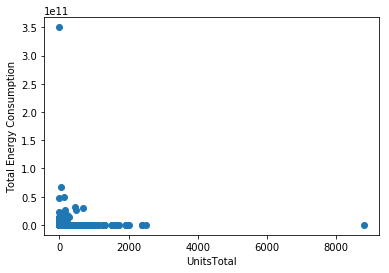

In [27]:
# first scatter plot
plt.plot(x, y, 'o')
plt.xlabel("UnitsTotal")
plt.ylabel("Total Energy Consumption")


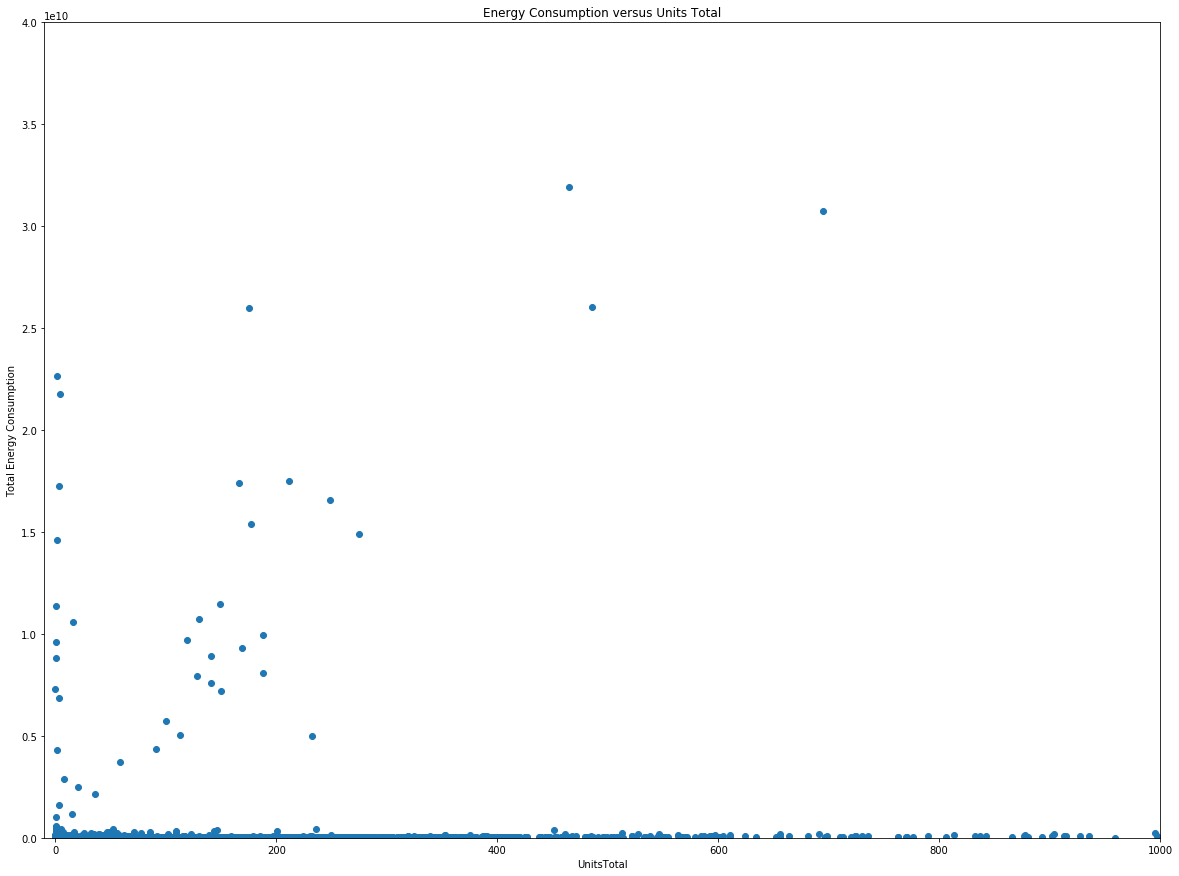

In [28]:
#zoomed in plot
fig = plt.figure()
fig, ax = plt.subplots(figsize=(20,15))
scatter= ax.scatter(x, y)
ax.set_xlabel("UnitsTotal")
ax.set_ylabel("Total Energy Consumption")
ax.set_xlim([-10,1000])
ax.set_ylim([-100,0.4e11])
#ax.set_legend()
ax.set_title("Energy Consumption versus Units Total")
pl.show()


In [29]:
print(type(bnrg["UnitsTotal"]),type(bnrg["Site_EUI"]))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


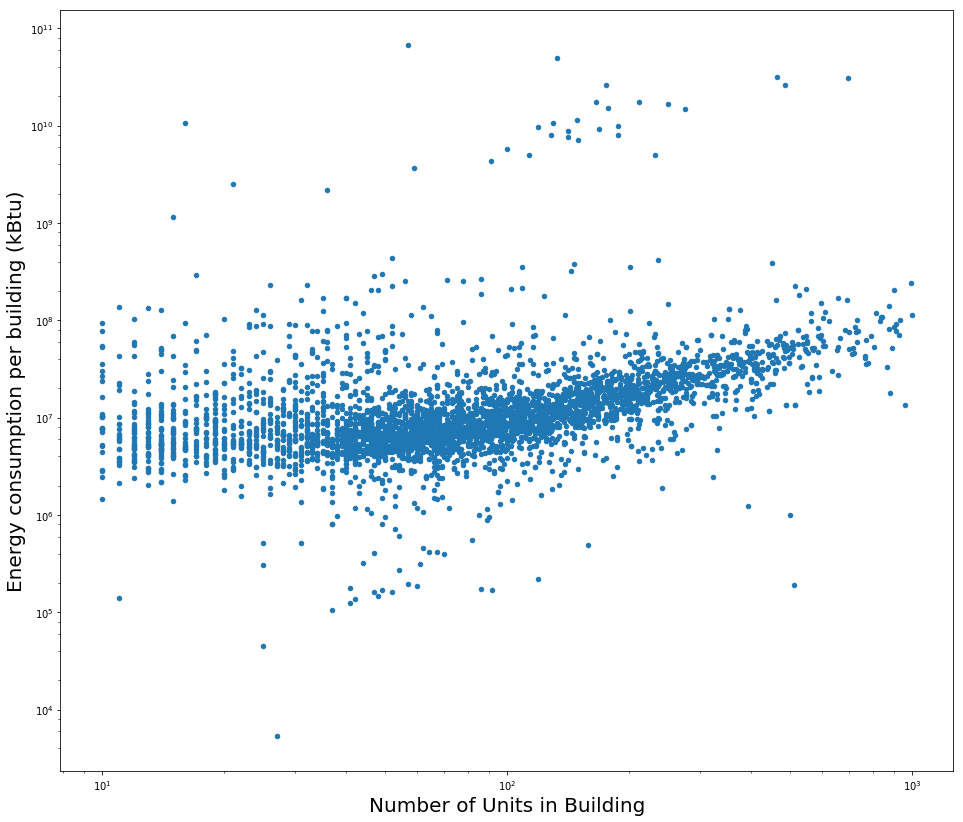

In [30]:
bnrg['nrg'] = bnrg["Site_EUI"]

bnrgCUT = bnrg[(bnrg.nrg > 1000) * (bnrg.UnitsTotal>=10) * 
                           (bnrg.UnitsTotal<1000)]

ax = bnrgCUT.plot(kind='scatter', y='nrg', x='UnitsTotal', 
                   marker='o',  figsize=(16, 14), loglog=True)
yl = ax.set_xlabel("Number of Units in Building", fontsize=20)
xl = ax.set_ylabel("Energy consumption per building (kBtu)", fontsize=20)

In [66]:
bnrgCUT["Site_EUIlog"]= np.log10(bnrgCUT["Site_EUI"])
bnrgCUT["UnitsTotallog"]= np.log10(bnrgCUT["UnitsTotal"])
bnrgCUT.head()



,index,BBL,ZipCode,UnitsRes,UnitsTotal,YearBuilt,ENERGY STAR Score,DOF Property Floor Area (Buildngs and Parking)(ft2),Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),Site_EUI_kBtu_ft2,Reported_Property_Floor_Area_ft2,Site_EUI,nrg,Site_EUIlog,UnitsTotallog
0,0,1.000048e+09,10004.0,0,52,1969,92,2621563.0,92.5,2428325,92.5,2428325.0,224620062.5,224620062.5,8.351449,1.716003
1,2,1.000088e+09,10004.0,97,98,1985,Not Available,169061.0,118.9,169055,118.9,169055.0,20100639.5,20100639.5,7.303210,1.991226
2,6,1.000100e+09,10004.0,0,15,1986,54,365792.0,106.1,405310,106.1,405310.0,43003391.0,43003391.0,7.633503,1.176091
3,7,1.000100e+09,10004.0,0,20,1962,64,321994.0,108,329991,108.0,329991.0,35639028.0,35639028.0,7.551926,1.301030
4,8,1.000110e+09,10004.0,20,21,1909,Not Available,51387.0,98,54091,98.0,54091.0,5300918.0,5300918.0,6.724351,1.322219


In [32]:

Site_EUIlog = bnrgCUT["Site_EUIlog"]
UnitsTotallog = bnrgCUT["UnitsTotallog"]

In [57]:
bnrgCUT=bnrgCUT.reset_index()


In [58]:
lm = smf.ols('Site_EUIlog ~ UnitsTotallog ', bnrgCUT).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Site_EUIlog   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     799.2
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.77e-160
Time:                        21:52:30   Log-Likelihood:                -2366.8
No. Observations:                4010   AIC:                             4738.
Df Residuals:                    4008   BIC:                             4750.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         6.1057      0.034    180.991      0.000         6.040     6.172
UnitsTotallog     0.4930      0.017     28.270      0.000         0.459     0.527
==============================================================================
Omnibus:                     2199.523   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46761.704
Skew:                           2.160   Prob(JB):                         0.00
Kurtosis:                      19.162   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

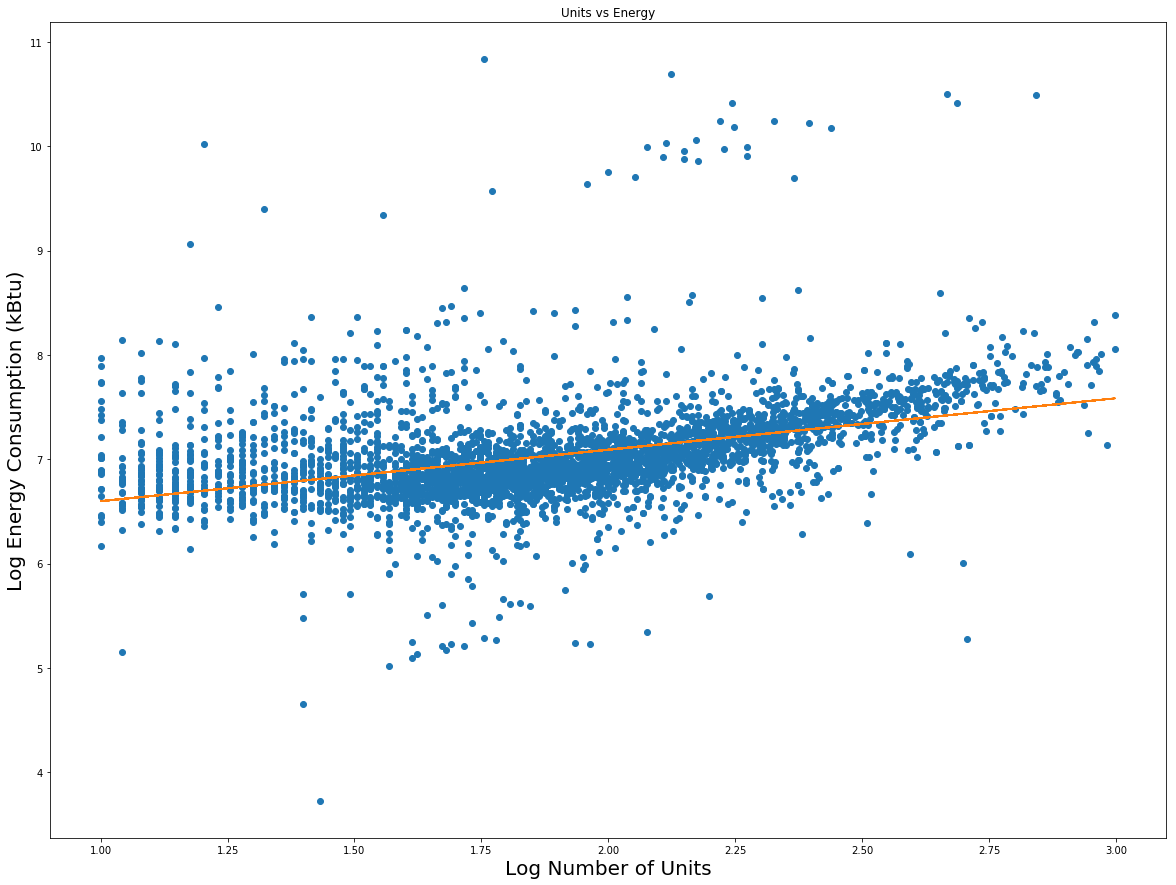

In [34]:
#Fit a line to Units vs Energy. The independent variable in this problem should be number of units, but try fit both Unity to energy and energy to unit.

plt.figure(figsize = (20,15)) 
plt.plot(UnitsTotallog, Site_EUIlog ,'o') 
plt.plot(UnitsTotallog,lm.predict())
plt.title("Units vs Energy")
plt.xlabel('Log Number of Units', fontsize= 20)
plt.ylabel('Log Energy Consumption (kBtu)',  fontsize= 20)
plt.show()

In [35]:
#Fit a line to Energy vs Units.

In [59]:
lm1 = smf.ols('UnitsTotallog ~ Site_EUIlog', bnrgCUT).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UnitsTotallog   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     799.2
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.77e-160
Time:                        21:52:48   Log-Likelihood:                -1605.2
No. Observations:                4010   AIC:                             3214.
Df Residuals:                    4008   BIC:                             3227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.4801      0.084     -5.705      0.000        -0.645    -0.315
Site_EUIlog     0.3372      0.012     28.270      0.000         0.314     0.361
==============================================================================
Omnibus:                      148.669   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.072
Skew:                          -0.480   Prob(JB):                     1.43e-36
Kurtosis:                       3.257   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:

#X = sm.add_constant(np.log10(x))
#linmodel = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN

AttributeError: 'module' object has no attribute 'add_constant'

In [95]:
UnitsTotal=bnrgCUT['UnitsTotal']
Site_EUI=bnrgCUT['Site_EUI']


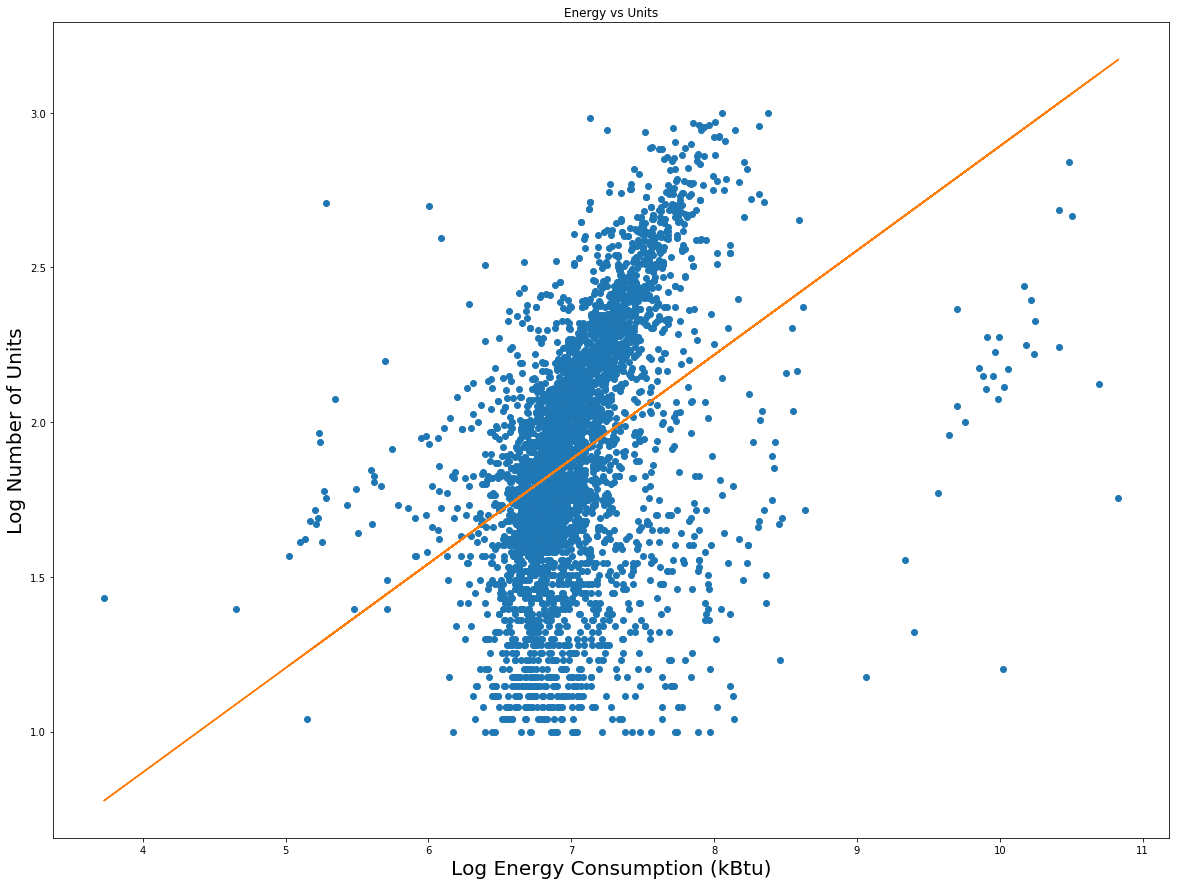

In [60]:
#lm1
plt.figure(figsize = (20,15)) 
plt.plot(Site_EUIlog, UnitsTotallog, 'o') 
plt.plot(Site_EUIlog,lm1.predict())
plt.title("Energy vs Units")
plt.ylabel('Log Number of Units', fontsize= 20)
plt.xlabel('Log Energy Consumption (kBtu)',  fontsize= 20)
plt.show()

In [ ]:
lm15 = smf.ols('Site_EUIlog ~ UnitsTotallog', data= bnrgCUT).fit()

lm15.summary()
plt.figure(figsize = (20,15)) 
plt.plot(Site_EUIlog, UnitsTotallog, 'o') 
plt.plot(Site_EUIlog,lm1.predict())
plt.title("Energy vs Units")
plt.ylabel('Log Number of Units', fontsize= 20)
plt.xlabel('Log Energy Consumption (kBtu)',  fontsize= 20)
plt.show()

In [87]:
lm2 = smf.ols('Site_EUIlog ~ UnitsTotallog + I(UnitsTotallog**2)', data= bnrgCUT).fit()

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Site_EUIlog   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     598.2
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          4.81e-228
Time:                        22:14:57   Log-Likelihood:                -2207.6
No. Observations:                4010   AIC:                             4421.
Df Residuals:                    4007   BIC:                             4440.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 8.1240      0.116     70.316      0.000         7.897     8.351
UnitsTotallog            -1.7181      0.123    -14.010      0.000        -1.959    -1.478
I(UnitsTotallog ** 2)     0.5795      0.032     18.201      0.000         0.517     0.642
==============================================================================
Omnibus:                     2373.115   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63720.880
Skew:                           2.326   Prob(JB):                         0.00
Kurtosis:                      21.967   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

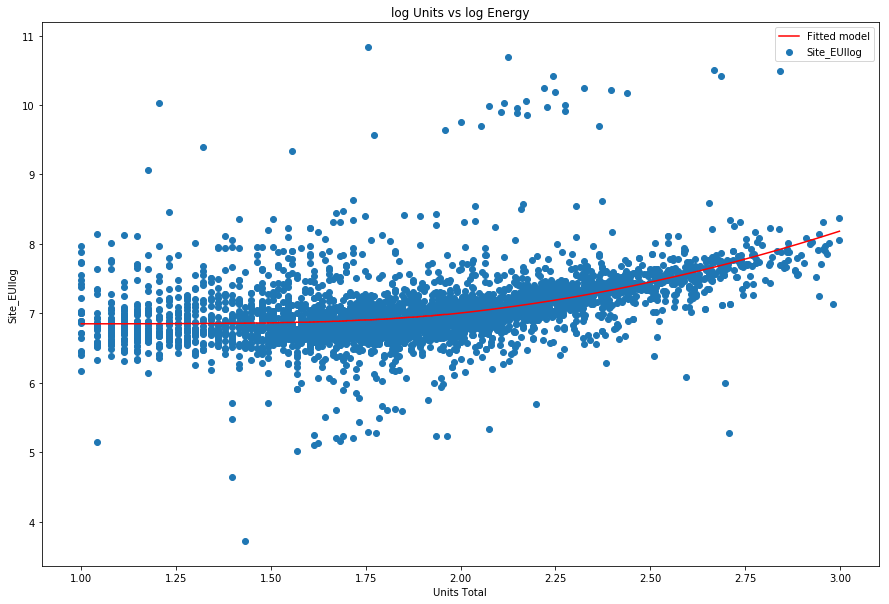

In [106]:
pl.figure(figsize=(15,10))
pl.scatter(UnitsTotallog, Site_EUIlog)
pl.plot(UnitsTotallog.head(len(lm2.predict())).sort_values(),np.sort(lm2.predict()),
        c='red',label='Fitted model')
plt.title("log Units vs log Energy")
pl.xlabel("Units Total")
pl.ylabel("Site_EUIlog")
pl.legend()

In [101]:
lm3 = smf.ols('UnitsTotallog ~ Site_EUIlog + I(Site_EUIlog**2)', data= bnrgCUT).fit()

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UnitsTotallog   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     456.2
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          3.28e-179
Time:                        22:31:16   Log-Likelihood:                -1558.5
No. Observations:                4010   AIC:                             3123.
Df Residuals:                    4007   BIC:                             3142.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              -4.4164      0.413    -10.684      0.000        -5.227    -3.606
Site_EUIlog             1.3994      0.110     12.733      0.000         1.184     1.615
I(Site_EUIlog ** 2)    -0.0711      0.007     -9.721      0.000        -0.085    -0.057
==============================================================================
Omnibus:                      119.564   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.202
Skew:                          -0.401   Prob(JB):                     7.22e-30
Kurtosis:                       3.401   Cond. No.                     3.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

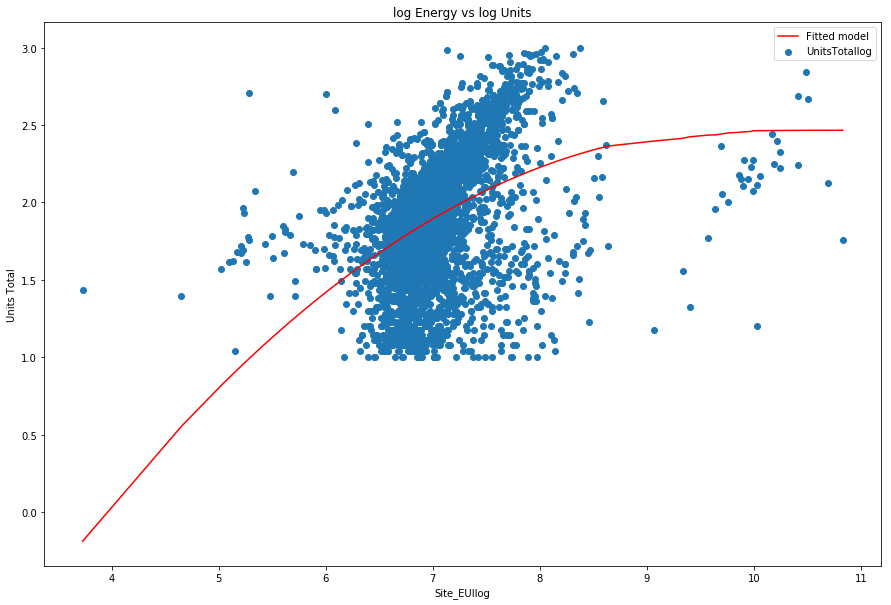

In [108]:
pl.figure(figsize=(15,10))
pl.scatter(Site_EUIlog, UnitsTotallog)
pl.plot(Site_EUIlog.head(len(lm3.predict())).sort_values(),np.sort(lm3.predict()),
        c='red',label='Fitted model')
pl.title("log Energy vs log Units")
pl.ylabel("Units Total")
pl.xlabel("Site_EUIlog")
pl.legend()

In [103]:
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

log Units vs log Energy
114669757.385
log Energy vs log Units
1.27681852944e+22


In [123]:
#print (chi2(Site_EUI,lm.predict()))
#print (chi2(UnitsTotal,lm.predict()))
#print (chi2(UnitsTotallog,lm.predict()))
print ("log Energy vs log Units degree1")

print (chi2(UnitsTotallog,lm1.predict()))
#print (chi2(UnitsTotallog,lm.predict()))

print ("log Units vs log Energy degree1")

print (chi2(Site_EUIlog,lm.predict()))
#print (chi2(Site_EUIlog,lm1.predict()))

#print (chi2(Site_EUI,lm2.predict()))


log Energy vs log Units degree1
522.839430304
log Units vs log Energy degree1
764.43182103


log Energy vs log Units has a higher ChiSq

In [124]:
## Assume that there is error in the reported energy. 
## but that is the product of two measured qusntities, each of which will have errors. 
## The minimum error is the squareroot of the value

#Below I am writing out some uncertainties - please explain the functional form that I used.
#errors on the measured quantities
errorsnrg = np.sqrt((bnrgCUT['Reported_Property_Floor_Area_ft2'])**2 +\
                (bnrgCUT['Site_EUI_kBtu_ft2']**2))

## Assume count statistics in the number of units as well
errorsunits = np.sqrt(bnrgCUT.UnitsTotal)

#These errors need to be propagated properly through the log


In [125]:
errorsInLogNrg = np.abs(errorsnrg / (bnrg.nrg / np.log(10)))
errorsInLogUnits = np.abs(errorsunits / (bnrg.UnitsTotal / np.log(10)))

bnrg['errorsnrg'] = errorsInLogNrg
bnrg['errorsunits'] = errorsInLogUnits

In [126]:
bnrg.head()

,BBL,ZipCode,UnitsRes,UnitsTotal,YearBuilt,ENERGY STAR Score,DOF Property Floor Area (Buildngs and Parking)(ft2),Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),Site_EUI_kBtu_ft2,Reported_Property_Floor_Area_ft2,Site_EUI,nrg,errorsnrg,errorsunits
0,1.000048e+09,10004.0,0,52,1969,92,2621563.0,92.5,2428325,92.5,2428325.0,224620062.5,224620062.5,0.024893,0.319311
1,1.000058e+09,10004.0,0,7,1970,73,1354691.0,134.5,1338000,134.5,1338000.0,179961000.0,179961000.0,0.002163,3.256347
2,1.000088e+09,10004.0,97,98,1985,Not Available,169061.0,118.9,169055,118.9,169055.0,20100639.5,20100639.5,0.046429,0.090999
3,1.000090e+09,10004.0,0,9,1970,78,845018.0,78.5,852840,78.5,852840.0,66947940.0,66947940.0,0.011350,1.144164
4,1.000090e+09,10004.0,0,0,1987,Not Available,544015.0,68.6,574095,68.6,574095.0,39382917.0,39382917.0,0.003163,inf


In [127]:
lm4 = smf.ols('errorsunits ~ errorsnrg', bnrgCUT).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            errorsunits   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     776.1
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          2.78e-156
Time:                        22:51:53   Log-Likelihood:                -11555.
No. Observations:                4010   AIC:                         2.311e+04
Df Residuals:                    4008   BIC:                         2.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.4053      0.085     98.891      0.000         8.239     8.572
errorsnrg   7.159e-06   2.57e-07     27.858      0.000      6.66e-06  7.66e-06
==============================================================================
Omnibus:                      275.984   Durbin-Watson:                   1.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              853.550
Skew:                           0.333   Prob(JB):                    4.51e-186
Kurtosis:                       5.160   Cond. No.                     4.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
print ("LR : ", -2 * ( lm.llf-lm2.llf ))
print ("LR from statsmodels:", lm.compare_lr_test(lm2))

LR :  318.529899167
LR from statsmodels: (-318.52989916721526, nan, -1.0)


In [ ]:
#https://github.com/fedhere/PUI2017_fb55/blob/master/HW5_fb55/Assignment3_solution.ipynb


In [131]:

#(lm.llf - lm1.llf) * -2
lm1.compare_lr_test(lm)


(1523.2323442750812, nan, 0.0)